In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import warnings
import json

warnings.filterwarnings("ignore")
pd.options.display.float_format = '{:.4%}'.format

params = json.loads(open('params.json', 'r').read())

# Date range
start = params["start_date"]
end = params["end_date"]

# Tickers of assets
OIL = 'Oil gas biofuels, exploration, refining etc'
TELCO = 'Telecommunications'
PULP_PAPER = 'Pulp and Paper'
ELECTRICAL = 'Electrical energy'
MINERALS = 'Minerals'

assets = ["EGIE3.SA", "PRIO3.SA", "UGPA3.SA", "GGBR3.SA"]

# Downloading data
data = yf.download(assets, start = start, end = end)

data = data.loc[:,('Adj Close', slice(None))]

data.columns = assets

[*********************100%%**********************]  4 of 4 completed


In [2]:
# Calculating returns
Y = data[assets].pct_change().dropna()

display(Y.tail())

,EGIE3.SA,PRIO3.SA,UGPA3.SA,GGBR3.SA
Date,,,,
2023-10-27,-1.0401%,-0.5421%,-0.4792%,-2.5238%
2023-10-30,-1.5515%,0.3469%,-2.9516%,-0.3908%
2023-10-31,-0.1017%,-0.9383%,2.8904%,0.2943%
2023-11-01,2.2646%,0.9472%,0.7757%,3.7164%
2023-11-03,1.6920%,3.4568%,0.2704%,0.6129%


,EGIE3.SA,PRIO3.SA,UGPA3.SA,GGBR3.SA
weights,0.0001%,20.0365%,19.0872%,60.8763%


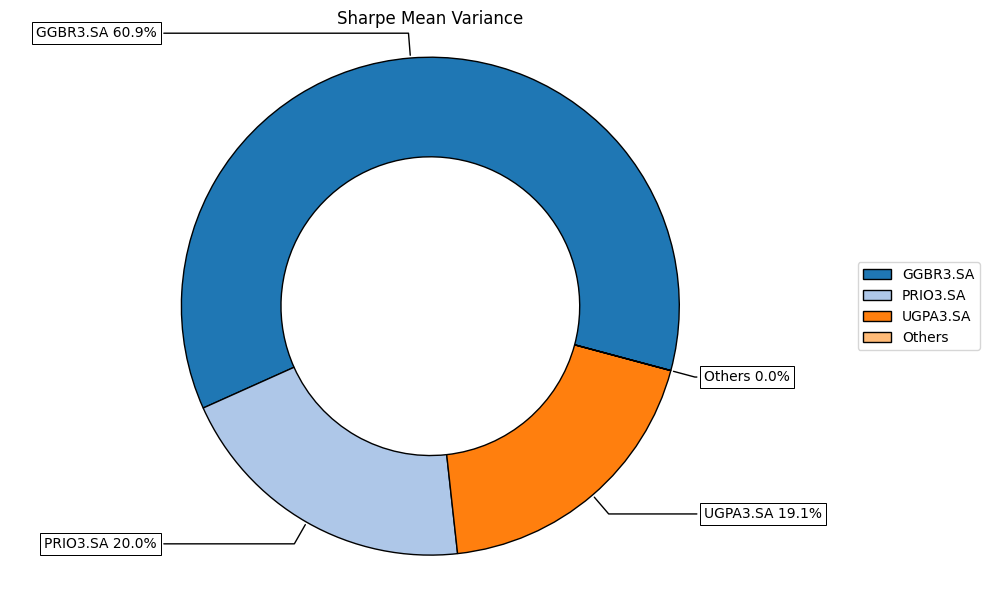

In [3]:
import riskfolio as rp

# Building the portfolio object
port = rp.Portfolio(returns=Y)

# Calculating optimal portfolio

# Select method and estimate input parameters:

method_mu='hist' # Method to estimate expected returns based on historical data.
method_cov='hist' # Method to estimate covariance matrix based on historical data.

port.assets_stats(method_mu=method_mu, method_cov=method_cov, d=0.94)

# Estimate optimal portfolio:

model='Classic' # Could be Classic (historical), BL (Black Litterman) or FM (Factor Model)
rm = 'MV' # Risk measure used, this time will be variance
obj = 'Sharpe' # Objective function, could be MinRisk, MaxRet, Utility or Sharpe
hist = True # Use historical scenarios for risk measures that depend on scenarios
rf = 0 # Risk free rate
l = 0 # Risk aversion factor, only useful when obj is 'Utility'

w_sharpe = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

display(w_sharpe.T)

# Plotting the composition of the portfolio

ax_sharpe = rp.plot_pie(w=w_sharpe, title='Sharpe Mean Variance', others=0.05, nrow=25, cmap = "tab20",
                 height=6, width=10, ax=None)

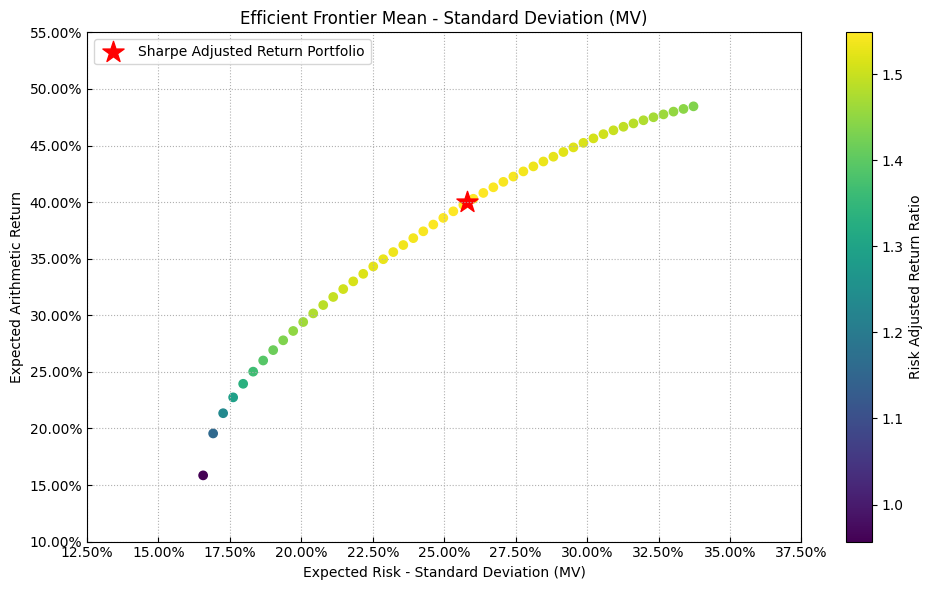

In [4]:
# Plotting frontier

points = 50 # Number of points of the frontier

frontier = port.efficient_frontier(model=model, rm=rm, points=points, rf=rf, hist=hist)
# display(frontier.T.tail())

# Plotting the efficient frontier

label = 'Sharpe Adjusted Return Portfolio' # Title of point
mu = port.mu # Expected returns
cov = port.cov # Covariance matrix
returns = port.returns # Returns of the assets

ax = rp.plot_frontier(w_frontier=frontier, mu=mu, cov=cov, returns=returns, rm=rm,
                      rf=rf, alpha=0.05, cmap='viridis', w=w_sharpe, label=label,
                      marker='*', s=16, c='r', height=6, width=10, ax=None)


In [5]:
# 'MV': Standard Deviation.
# 'MAD': Mean Absolute Deviation.
# 'MSV': Semi Standard Deviation.
# 'FLPM': First Lower Partial Moment (Omega Ratio).
# 'SLPM': Second Lower Partial Moment (Sortino Ratio).
# 'CVaR': Conditional Value at Risk.
# 'EVaR': Entropic Value at Risk.
# 'WR': Worst Realization (Minimax)
# 'MDD': Maximum Drawdown of uncompounded cumulative returns (Calmar Ratio).
# 'ADD': Average Drawdown of uncompounded cumulative returns.
# 'CDaR': Conditional Drawdown at Risk of uncompounded cumulative returns.
# 'EDaR': Entropic Drawdown at Risk of uncompounded cumulative returns.
# 'UCI': Ulcer Index of uncompounded cumulative returns.

In [6]:
# Risk Measures available:
#
# 'MV': Standard Deviation.
# 'MAD': Mean Absolute Deviation.
# 'MSV': Semi Standard Deviation.
# 'FLPM': First Lower Partial Moment (Omega Ratio).
# 'SLPM': Second Lower Partial Moment (Sortino Ratio).
# 'CVaR': Conditional Value at Risk.
# 'EVaR': Entropic Value at Risk.
# 'WR': Worst Realization (Minimax)
# 'MDD': Maximum Drawdown of uncompounded cumulative returns (Calmar Ratio).
# 'ADD': Average Drawdown of uncompounded cumulative returns.
# 'CDaR': Conditional Drawdown at Risk of uncompounded cumulative returns.
# 'EDaR': Entropic Drawdown at Risk of uncompounded cumulative returns.
# 'UCI': Ulcer Index of uncompounded cumulative returns.

rms = ['MV', 'MAD', 'MSV', 'FLPM', 'SLPM', 'CVaR',
       'EVaR', 'WR', 'MDD', 'ADD', 'CDaR', 'UCI', 'EDaR']

w_s = pd.DataFrame([])

for i in rms:
    w = port.optimization(model=model, rm=i, obj=obj, rf=rf, l=l, hist=hist)
    w_s = pd.concat([w_s, w], axis=1)
    
w_s.columns = rms

w_s.style.format("{:.2%}").background_gradient(cmap='YlGn')

,MV,MAD,MSV,FLPM,SLPM,CVaR,EVaR,WR,MDD,ADD,CDaR,UCI,EDaR
EGIE3.SA,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,3.24%,0.00%,0.87%,0.00%
PRIO3.SA,20.04%,13.10%,19.23%,12.95%,19.54%,30.82%,26.10%,27.58%,5.17%,3.04%,4.25%,8.79%,4.63%
UGPA3.SA,19.09%,13.43%,14.05%,13.16%,14.12%,16.78%,5.89%,0.00%,35.91%,22.35%,30.72%,20.57%,32.86%
GGBR3.SA,60.88%,73.46%,66.72%,73.89%,66.34%,52.40%,68.01%,72.42%,58.92%,71.36%,65.02%,69.77%,62.51%


,EGIE3.SA,PRIO3.SA,UGPA3.SA,GGBR3.SA
weights,70.2105%,19.9155%,9.8740%,0.0000%


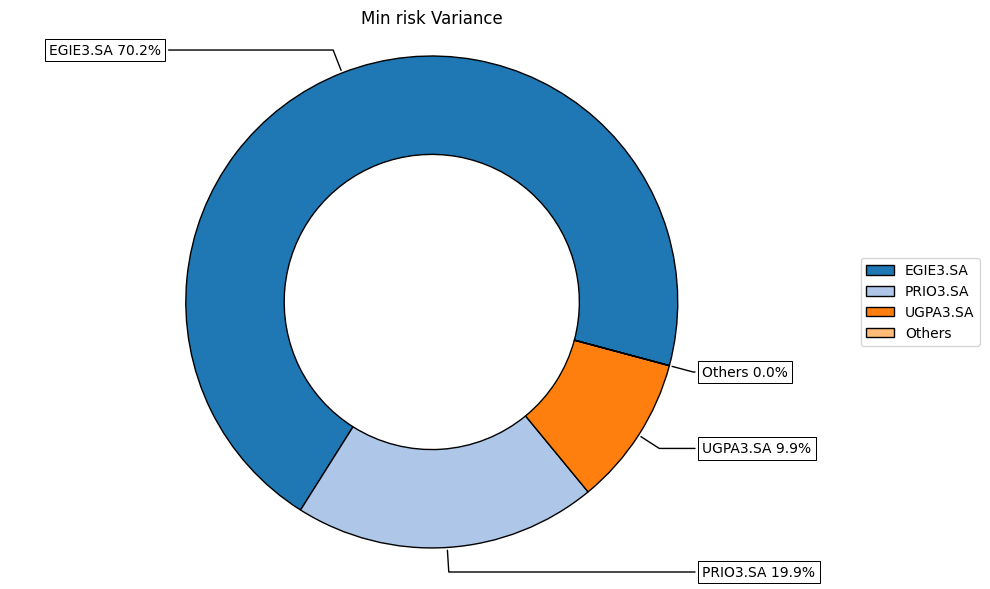

In [7]:
import riskfolio as rp

# Building the portfolio object
port = rp.Portfolio(returns=Y)

# Calculating optimal portfolio

# Select method and estimate input parameters:

method_mu='hist' # Method to estimate expected returns based on historical data.
method_cov='hist' # Method to estimate covariance matrix based on historical data.

port.assets_stats(method_mu=method_mu, method_cov=method_cov, d=0.94)

# Estimate optimal portfolio:

model='Classic' # Could be Classic (historical), BL (Black Litterman) or FM (Factor Model)
rm = 'MV' # Risk measure used, this time will be variance
obj = 'MinRisk' # Objective function, could be MinRisk, MaxRet, Utility or Sharpe
hist = True # Use historical scenarios for risk measures that depend on scenarios
rf = 0 # Risk free rate
l = 0 # Risk aversion factor, only useful when obj is 'Utility'

w_min_risk = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

display(w_min_risk.T)


# Plotting the composition of the portfolio

ax_min_risk = rp.plot_pie(w=w_min_risk, title='Min risk Variance', others=0.05, nrow=25, cmap = "tab20",
                 height=6, width=10, ax=None)

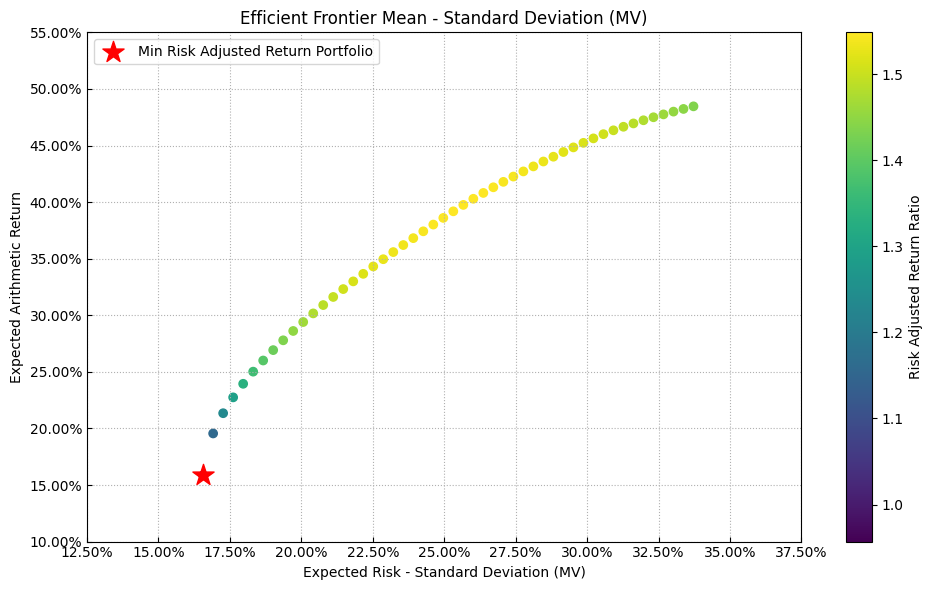

In [8]:
# Plotting frontier

points = 50 # Number of points of the frontier

frontier = port.efficient_frontier(model=model, rm=rm, points=points, rf=rf, hist=hist)
# display(frontier.T.tail())

# Plotting the efficient frontier

label = 'Min Risk Adjusted Return Portfolio' # Title of point
mu = port.mu # Expected returns
cov = port.cov # Covariance matrix
returns = port.returns # Returns of the assets

ax = rp.plot_frontier(w_frontier=frontier, mu=mu, cov=cov, returns=returns, rm=rm,
                      rf=rf, alpha=0.05, cmap='viridis', w=w_min_risk, label=label,
                      marker='*', s=16, c='r', height=6, width=10, ax=None)


In [9]:
# 'MV': Standard Deviation.
# 'MAD': Mean Absolute Deviation.
# 'MSV': Semi Standard Deviation.
# 'FLPM': First Lower Partial Moment (Omega Ratio).
# 'SLPM': Second Lower Partial Moment (Sortino Ratio).
# 'CVaR': Conditional Value at Risk.
# 'EVaR': Entropic Value at Risk.
# 'WR': Worst Realization (Minimax)
# 'MDD': Maximum Drawdown of uncompounded cumulative returns (Calmar Ratio).
# 'ADD': Average Drawdown of uncompounded cumulative returns.
# 'CDaR': Conditional Drawdown at Risk of uncompounded cumulative returns.
# 'EDaR': Entropic Drawdown at Risk of uncompounded cumulative returns.
# 'UCI': Ulcer Index of uncompounded cumulative returns.

In [10]:
# Risk Measures available:
#
# 'MV': Standard Deviation.
# 'MAD': Mean Absolute Deviation.
# 'MSV': Semi Standard Deviation.
# 'FLPM': First Lower Partial Moment (Omega Ratio).
# 'SLPM': Second Lower Partial Moment (Sortino Ratio).
# 'CVaR': Conditional Value at Risk.
# 'EVaR': Entropic Value at Risk.
# 'WR': Worst Realization (Minimax)
# 'MDD': Maximum Drawdown of uncompounded cumulative returns (Calmar Ratio).
# 'ADD': Average Drawdown of uncompounded cumulative returns.
# 'CDaR': Conditional Drawdown at Risk of uncompounded cumulative returns.
# 'EDaR': Entropic Drawdown at Risk of uncompounded cumulative returns.
# 'UCI': Ulcer Index of uncompounded cumulative returns.

rms = ['MV', 'MAD', 'MSV', 'FLPM', 'SLPM', 'CVaR',
       'EVaR', 'WR', 'MDD', 'ADD', 'CDaR', 'UCI', 'EDaR']

w_s = pd.DataFrame([])

for i in rms:
    w = port.optimization(model=model, rm=i, obj=obj, rf=rf, l=l, hist=hist)
    w_s = pd.concat([w_s, w], axis=1)
    
w_s.columns = rms

w_s.style.format("{:.2%}").background_gradient(cmap='YlGn')

,MV,MAD,MSV,FLPM,SLPM,CVaR,EVaR,WR,MDD,ADD,CDaR,UCI,EDaR
EGIE3.SA,70.21%,72.12%,67.49%,68.79%,66.07%,66.43%,52.37%,48.22%,58.49%,37.40%,46.93%,40.77%,48.21%
PRIO3.SA,19.92%,18.96%,23.17%,20.59%,23.56%,22.16%,23.47%,26.90%,11.65%,5.89%,15.58%,8.15%,16.08%
UGPA3.SA,9.87%,8.93%,9.33%,8.29%,10.32%,10.52%,24.16%,24.88%,20.10%,15.37%,17.23%,15.95%,16.65%
GGBR3.SA,0.00%,0.00%,0.00%,2.33%,0.05%,0.89%,0.00%,0.00%,9.76%,41.34%,20.27%,35.13%,19.06%
